# Goal
The purpose of this notebook is to explore the new data as part of the extension plan.

Specifically, the data we will look at includes the following:
 
* `./input/deschutes_hospitalizations_asthma.csv`: hospitalization & emergency vist rates due to Asthma from 2000-2021 in Deschutes County, Oregon. Rates are per 10,000.
* `./input/deschutes_hospitalizations_COPD.csv`: hospitalization & emergency visit rates due to COPD from 2000-2021 in Deschutes County, Oregon. Rates are per 10,000.
* `./input/deschutes_age_adjusted_premature_death_rate.csv`: age adjusted premature death rates over the past 20 years in Deschutes County, Oregon. Rates are per 100,000.
* `./input/IHME-GBD_2019_DATA-Chronic_Respiratory_Illness_Oregon.csv`: death, incidence, and prevalence rates for Asthma, COPD, and all chronic respiratory illnesses for the state of Oregon. Rates are per 100,000.


### Deschutes Asthma Data

[Data Source](https://visual-data.dhsoha.state.or.us/t/OHA/views/Asthma/About?%3Aembed=y&%3AisGuestRedirectFromVizportal=y)

Notes: 
* An Asthma hospitalization is when a patient has a primary diagnosis of Ashtma
   * Prior to October 1, 2015, a "primary diagnosis" was tracked by the International Classification of Diseases, Ninth Revision, Clinical Modification code (ICD-9-CM) 493 as the primary diagnosis
   * From October, 2015 onwards, the primary diagnosis was tracked using International Classification of Diseases, Tenth Revision, Clinical Modification code (ICD-10-CM) J45.
   * As such, any differences in rates prior to 2015 and subsquent years could be attributed to the coding change.
* Multiple-visits by same individual at differnet times are counted as the measure is meant for the diagnosis and not the individual. However, duplicates arising from transferring hospitals aren't counted.
* Records for people receive care at home, in ERs, in outpatient clinics are not included. Data for Veterans Affairs, Indian Health Services, and prisons are also not included. Similarly, hospitalizations occuring out-of-state for Deschutes residents aren't tracked.
* Data is "suppressed" when counts are less than 6 for populations under 100,000. Rates are "unstable" when relative standard error is >30%.


### Deschutes COPD Data

[Data Source](https://visual-data.dhsoha.state.or.us/t/OHA/views/COPD/About?%3Aembed=y&%3AisGuestRedirectFromVizportal=y)

Notes: 
* A COPD hospitalization is when a patient has a primary diagnosis of COPD/
   * Prior to October 1, 2015, a "primary diagnosis" was tracked by the International Classification of Diseases, Ninth Revision, Clinical Modification code (ICD-9-CM) 490-492,496 as the primary diagnosis or when 493.2 was a primary diagnosis with 490-492,496 present in other diagnosis codes.
   * From October, 2015 onwards, the primary diagnosis was tracked using International Classification of Diseases Tenth Revision, Clinical Modification code (ICD-10-CM) J40-J44.
   * As such, any differences in rates prior to 2015 and subsquent years could be attributed to the coding change.
* Multiple-visits by same individual at differnet times are counted as the measure is meant for the diagnosis and not the individual. However, duplicates arising from transferring hospitals aren't counted.
* Records for people receive care at home, in ERs, in outpatient clinics are not included. Data for Veterans Affairs, Indian Health Services, and prisons are also not included. Similarly, hospitalizations occuring out-of-state for Deschutes residents aren't tracked.
* Data is "suppressed" when counts are less than 6 for populations under 100,000. Rates are "unstable" when relative standard error is >30%.
   
   
### Deschute Premature Death Rate

[Data Source](https://fred.stlouisfed.org/series/CDC20N2UAA041017)

"Age-adjusted death rates are weighted averages of the age-specific death rates, where the weights represent a fixed population by age. They are used to compare relative mortality risk among groups and over time. An age-adjusted rate represents the rate that would have existed had the age-specific rates of the particular year prevailed in a population whose age distribution was the same as that of the fixed population. Age-adjusted rates should be viewed as relative indexes rather than as direct or actual measures of mortality risk. However, you can select other standard populations, or select specific population criteria to determine the age distribution ratios.

Premature death rate includes all deaths where the deceased is younger than 75 years of age. 75 years of age is the standard consideration of a premature death according to the CDC's definition of Years of Potential Life Loss.

Starting with the 2019 vintage, the CDC no longer calculates rates for a county when the death count is less than 20, marking them as "unreliable." FRED records these instances as missing observations in the series."

### GHD IHME DATA
[Cause List ICD Codes](https://ghdx.healthdata.org/record/ihme-data/gbd-2019-cause-icd-code-mappings)

Cause of Death Codes:
* Asthma: 
    * ICD10: J45-J46.9
    * ICD9: 493-493.9
* COPD: 
    * ICD10: J41-J44.9
    * ICD9: 491-492.9, 496-499
* All Chronic Respiratory Illnesses:
    * ICD10: D86-D86.2, D86.9, G47.3, J30-J35.9, J37-J39.9, J41-J46.9, J60-J63.8, J65-J68.9, J70, J70.8-J70.9, J82, J84-J84.9, J91, J91.8-J92.9
    * ICD9: 135-135.9, 327.2-327.8, 470, 470.9-474.9, 476-476.1, 477-479, 491-493.9, 495-504.9, 506-506.9, 508-509, 515, 516-517.8, 518.6, 518.9, 519.1-519.4

Non-Fatal Causes Codes:
* Asthma:
    * ICD10: J45-J46.0
    * ICD9: 493-493.92
* COPD:
    * ICD10: J41-J44.9	
    * ICD9: 491-492.9, 496-499
* All Chronic Respiratory Illnesses:
    * ICD10: D86-D86.2, D86.9, J41-J65.0, J84-J84.9, J92.0
    * ICD9: 135-135.9, 491-505.9, 515-516.9

## License

Note that the code lies under the standard [MIT licence](./LICENSE).

# 0. Set-up
This notebooks assumes that the user has a working Jupyter Notebook Python 3 set-up. Instructions on installing them can be found [here](https://docs.jupyter.org/en/latest/install/notebook-classic.html).

Specifically, here are the following Python modules that we need for this work. Some are standard modules that come installed with Python and others should come installed as part of the [Anaconda](https://docs.jupyter.org/en/latest/install/notebook-classic.html) distribution. 

If modules are not found, they can be readily installed with the following terminal commands:

```bash
    pip install <module name>
```
or 
```bash
   conda install <module name>
```

In [1]:
# a highly recommended progress bar for loops.
from tqdm.auto import tqdm, trange
# a recommended module to read and wrangle data
import pandas as pd
# recommended modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Best for array manipulation
import numpy as np

# 1. Deschutes County Asthma & COPD

In [2]:
# Read County-Level Asthma Data
deschutes_asthma = pd.read_csv("./input/deschutes_hospitalizations_asthma.csv", 
    encoding= 'UTF-16', # file is encoded in UTF-16 instead of the standard UTF-8
    delimiter = '\t', # though the file is downloaded as a csv. It is tab-delimited. Why? IDK
)
# Read County-Level COPD Data
deschutes_copd = pd.read_csv("./input/deschutes_hospitalizations_copd.csv", 
    encoding= 'UTF-16', # file is encoded in UTF-16 instead of the standard UTF-8
    delimiter = '\t', # though the file is downloaded as a csv. It is tab-delimited. Why? IDK
)

In [3]:
# Filter for only Hospitalizations
deschutes_asthma = deschutes_asthma[deschutes_asthma['Type'] == "Hospitalizations"].copy()
deschutes_copd = deschutes_copd[deschutes_copd['Type'] == "Hospitalizations"].copy()

# Check that there are no missing values
assert deschutes_asthma.isna().sum().sum() == 0
assert deschutes_copd.isna().sum().sum() == 0

In [4]:
# let's see what the data looks like
deschutes_asthma.head()

,County,Type,Measure,2021,2020,2019,2018,2017,2016,2015,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
8,Deschutes,Hospitalizations,"Age Adjusted Rate per 10,000 Population",1.4,1.3,3.9,4.2,3.6,3.8,4.4,...,6.2,4.5,4.6,4.0,5.5,3.8,4.8,6.5,5.5,8.0
9,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population",1.5,1.5,2.7,3.1,3.0,2.9,3.6,...,6.3,6.2,5.9,5.8,6.7,6.4,6.7,7.5,7.0,6.9
10,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 0-4",9.2,4.5,9.9,12.4,10.1,8.8,8.8,...,16.1,13.8,13.4,13.0,16.8,22.6,25.3,24.9,19.6,24.3
11,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 5-14",2.1,1.5,6.7,4.5,5.3,4.9,4.3,...,5.3,5.6,4.2,4.7,5.5,5.3,5.6,5.9,5.4,6.7
12,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 15-34",1.4,1.2,1.5,1.9,2.5,1.6,2.0,...,3.4,3.0,2.7,2.1,2.8,2.8,3.3,3.7,3.6,3.7


In [5]:
# let's see what the data looks like
deschutes_copd.head()

,Geography,Type,Measure,2021,2020,2019,2018,2017,2016,2015,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
7,Deschutes,Hospitalizations,"Age Adjusted Rate per 10,000 Population, Ages ...",2.6,3.7,7.4,6.2,8.7,7.7,11.1,...,14.8,11.4,8.2,9.7,10.2,7.4,8.4,10.8,12.7,13.0
8,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 25 and ...",3.3,4.6,9.3,8.2,10.7,10.0,14.1,...,16.1,12.3,8.8,10.1,10.5,7.8,8.7,11.0,13.0,13.0
9,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 25-44",0.5,0.3,0.5,0.6,0.6,0.4,0.7,...,1.1,0.7,0.7,0.8,0.7,0.5,0.8,0.7,1.0,0.9
10,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 45-64",7.4,10.0,14.3,14.0,20.1,15.3,15.0,...,13.0,13.4,11.3,9.9,13.4,11.9,13.1,13.0,13.3,12.1
11,Deschutes,Hospitalizations,"Crude Rate per 10,000 Population, Ages 65-84",16.6,22.6,33.5,36.6,44.8,40.3,37.9,...,56.1,57.1,46.2,51.3,61.3,54.6,66.0,73.3,68.5,67.6


### Let's reorient the data so that each year is a row instead of a column.

We do this so that each can see each metric as column and the year as a row, making it easier to join tables together using the year as a join key.

In [6]:
# Convert years to be on rows instead of columns
deschutes_asthma = deschutes_asthma.drop(columns = [
    'County ', # All values are Deschutes -- name is "County " instead of "County" 
    'Type', # all values are "Hospitalizations"
]).set_index('Measure').T.reset_index().rename(columns={"index":"Year"})
deschutes_copd = deschutes_copd.drop(columns = [
    'Geography', # All values are Deschutes -- name is "Geography" instead of "County" 
    'Type', # all values are "Hospitalizations"
]).set_index('Measure').T.reset_index().rename(columns={"index":"Year"})

# remove name of index column
deschutes_asthma = deschutes_asthma.rename_axis(None, axis=1)
deschutes_copd = deschutes_copd.rename_axis(None, axis=1)

# make year column integers
deschutes_asthma['Year'] = deschutes_asthma['Year'].astype('int')
deschutes_copd['Year'] = deschutes_copd['Year'].astype('int')

# Sort values in ascending order of year
deschutes_asthma = deschutes_asthma.sort_values(by='Year')
deschutes_copd = deschutes_copd.sort_values(by='Year')

In [7]:
# let's see what the data looks like
deschutes_asthma.head()

,Year,"Age Adjusted Rate per 10,000 Population","Crude Rate per 10,000 Population","Crude Rate per 10,000 Population, Ages 0-4","Crude Rate per 10,000 Population, Ages 5-14","Crude Rate per 10,000 Population, Ages 15-34","Crude Rate per 10,000 Population, Ages 35-64","Crude Rate per 10,000 Population, Ages 65+",Number of Hospitalizations
21,2000,8.0,6.9,24.3,6.7,3.7,4.8,11.5,92.0
20,2001,5.5,7.0,19.6,5.4,3.6,6.4,11.1,66.0
19,2002,6.5,7.5,24.9,5.9,3.7,5.8,14.0,79.0
18,2003,4.8,6.7,25.3,5.6,3.3,5.0,11.4,62.0
17,2004,3.8,6.4,22.6,5.3,2.8,5.2,10.6,49.0


In [8]:
# let's see what the data looks like
deschutes_copd.head()

,Year,"Age Adjusted Rate per 10,000 Population, Ages 25 and Older","Crude Rate per 10,000 Population, Ages 25 and Older","Crude Rate per 10,000 Population, Ages 25-44","Crude Rate per 10,000 Population, Ages 45-64","Crude Rate per 10,000 Population, Ages 65-84"
21,2000,13.0,13.0,0.9,12.1,67.6
20,2001,12.7,13.0,1.0,13.3,68.5
19,2002,10.8,11.0,0.7,13.0,73.3
18,2003,8.4,8.7,0.8,13.1,66.0
17,2004,7.4,7.8,0.5,11.9,54.6


Now, the Deschutes data is in the expected format for joining.

<!-- ### Let's store these data into intermediate files: -->

In [256]:
# # Write to CSV
# deschutes_asthma.to_csv("./intermediate/deschutes_cleaned_hospitalizations_asthma_2000-2021.csv", index=False)
# deschutes_copd.to_csv("./intermediate/deschutes_cleaned_hospitalizations_copd_2000-2021.csv", index=False)

### Let's explore the series with a series of plots tracking the hospitalization rates for each disease.

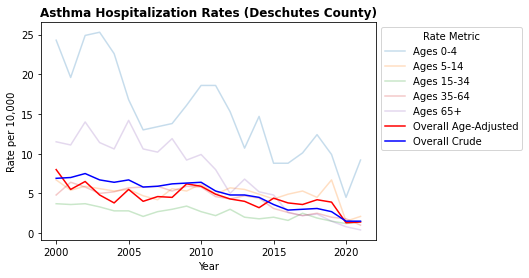

In [33]:
# Change column names for plotting
deschutes_asthmaP = deschutes_asthma.rename(columns = {
    'Age Adjusted Rate per 10,000 Population': 'Overall Age-Adjusted',
    'Crude Rate per 10,000 Population' : 'Overall Crude',
    'Crude Rate per 10,000 Population, Ages 0-4': "Ages 0-4",
    'Crude Rate per 10,000 Population, Ages 5-14': "Ages 5-14",
    'Crude Rate per 10,000 Population, Ages 15-34': "Ages 15-34",
    'Crude Rate per 10,000 Population, Ages 35-64': "Ages 35-64",
    'Crude Rate per 10,000 Population, Ages 65+': "Ages 65+",
})

# Plot only the rates per age bin
deschutes_asthmaP.set_index('Year').iloc[:,2:-1].plot(alpha=0.25)

# plot the overall rates bolder
deschutes_asthmaP.set_index('Year').iloc[:,0].plot(color='r') # age-adjusted rate
deschutes_asthmaP.set_index('Year').iloc[:,1].plot(color='b') # crude rate

# Title, axis labels and legend
plt.title("Asthma Hospitalization Rates (Deschutes County)", weight='bold')
plt.ylabel("Rate per 10,000")
plt.legend(bbox_to_anchor=(1,1), title = "Rate Metric")
plt.savefig("./output/Asthma_County_Hospitalization.png")

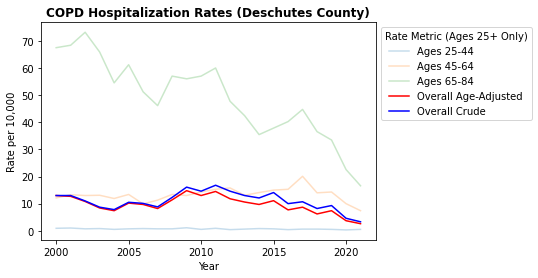

In [34]:
# Change Names for Plotting
deschutes_copdP = deschutes_copd.rename(columns = {
    'Age Adjusted Rate per 10,000 Population, Ages 25 and Older' : 'Overall Age-Adjusted',
   'Crude Rate per 10,000 Population, Ages 25 and Older': 'Overall Crude',
   'Crude Rate per 10,000 Population, Ages 25-44': 'Ages 25-44',
   'Crude Rate per 10,000 Population, Ages 45-64': 'Ages 45-64',
   'Crude Rate per 10,000 Population, Ages 65-84': 'Ages 65-84',
})
# plot only the rates per age bin
deschutes_copdP.set_index('Year').iloc[:,2:].plot(alpha=0.25)
# plot the overall bolder
deschutes_copdP.set_index('Year').iloc[:,0].plot(color='r')
deschutes_copdP.set_index('Year').iloc[:,1].plot(color='b')

# title axis labels and legend
plt.title("COPD Hospitalization Rates (Deschutes County)", weight='bold')
plt.ylabel("Rate per 10,000")
plt.legend(bbox_to_anchor=(1,1), title = "Rate Metric (Ages 25+ Only)")
plt.savefig("./output/COPD_County_Hospitalization.png")

Hmm, it looks like the hospitalization rates for both asthma and COPD are stable and even slightly dropping.

# 2. Deschutes Age-Adjusted Premature Death Rate

In [11]:
# read in the data
deschutes_premature = pd.read_csv("./input/deshutes_age_adjusted_premature_death_rate.csv")

# Change date to year
deschutes_premature['Year'] = pd.to_datetime(deschutes_premature.DATE).dt.year
# change columns name to age adjusted death rate & convert to per 10,000.
deschutes_premature['Age Adjusted Premature Death Rate'] = deschutes_premature.iloc[:, 1] / 10

# drop extra columns
deschutes_premature = deschutes_premature[['Year', 'Age Adjusted Premature Death Rate']]

# # move to intermediate data
# deschutes_premature.to_csv("./intermediate/deschutes_cleaned_premature_death_1999-2020.csv", index=False)

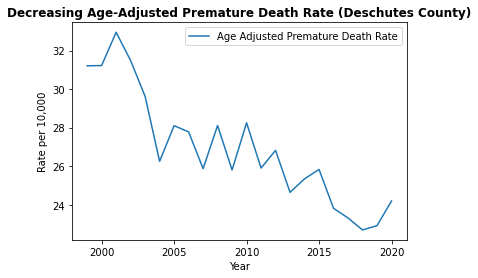

In [32]:
# Plot the Age-Adjusted Premature Death Rate
deschutes_premature.set_index('Year').plot()
plt.title("Decreasing Age-Adjusted Premature Death Rate (Deschutes County)", weight='bold')
plt.ylabel("Rate per 10,000")
# plt.legend(bbox_to_anchor=(1,1), title = "Metric")
plt.savefig("./output/Respiratory_Health_County_Premature_Mortality.png")

We see that the age-adjusted premature death rate decreases steadily over time. Interesting...

# 3. State-Level Data for Chronic Respiratory Ilnesses

Now, let's look at the state level mortality, incidence, and prevalence rates for each disease.

In [13]:
# load data
state_data = pd.read_csv('./input/IHME-GBD_2019_DATA-Chronic_Respiratory_Illness_Oregon.csv')
# drop useless columns
state_data = state_data.drop(columns = [
    'location', # always "Oregon"
    'sex', # always "Both"
    'age', # always "All ages"
])
# preview portions of the data
pd.concat([state_data.head(), state_data.tail()])

,measure,cause,metric,year,val,upper,lower
0,Deaths,Asthma,Number,1991,75.780834,84.457518,67.106547
1,Deaths,Asthma,Rate,1991,2.581529,2.877107,2.286034
2,Deaths,Chronic respiratory diseases,Number,1990,1468.916244,1596.351187,1351.053983
3,Deaths,Chronic respiratory diseases,Rate,1990,50.669184,55.064958,46.603612
4,Deaths,Chronic obstructive pulmonary disease,Number,1990,1261.661435,1358.945816,1160.241283
535,Incidence,Chronic obstructive pulmonary disease,Rate,2017,394.803347,419.174832,368.158301
536,Incidence,Chronic obstructive pulmonary disease,Number,2018,16149.376390,17137.975334,15033.413396
537,Incidence,Chronic obstructive pulmonary disease,Rate,2018,402.054168,426.666284,374.271202
538,Incidence,Chronic obstructive pulmonary disease,Number,2019,16511.833343,17541.681204,15357.716515
539,Incidence,Chronic obstructive pulmonary disease,Rate,2019,409.691454,435.244029,381.055518


In [14]:
# separate rates and raw numbers
state_data_rates = state_data[state_data['metric'] == 'Rate'].drop(columns = 'metric')
state_data_number = state_data[state_data['metric'] == 'Number'].drop(columns = 'metric')

The state data has rates as per 100,000 instead of per 10,000 so we need to correct for that.

In [15]:
# Let's pivot the data & convert the rate from per 100,000 to per 10,000
state_data_rates = state_data_rates.pivot(index='year', columns = ['measure', 'cause']) / 10

#### Let's take a quick look at the mortality rates for Asthma, COPD, and chronic RIs.

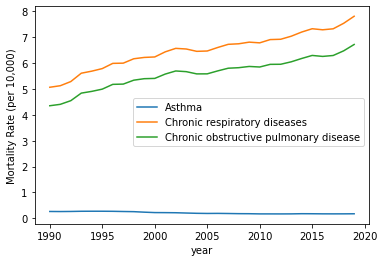

In [16]:
# fig, ax = plt.subplots(1,3, figsize= (30,10))
state_data_rates['val']['Deaths'].plot()
plt.ylabel("Mortality Rate (per 10,000)")
plt.legend(bbox_to_anchor=(1,0.6))

Seems like COPD has a very high mortality rate compared to asthma, making up most of the mortality rates for all chronic respiratory illnesses.

Currently, our data is stored as a DF with heirarchical indexing. This is quite annoying to work with so let's separate the dataframe into multiple smaller ones.

In [17]:
# Let's separate the data
state_incidence = state_data_rates['val']['Incidence'].reset_index()
state_prevalence = state_data_rates['val']['Prevalence'].reset_index()
state_death = state_data_rates['val']['Deaths'].reset_index()

#### Let's make some beautiful plots tracking the prevalence, incidence, & mortality of these diseases.

Text(0.5, 1.0, 'Trends in Chronic Respiratory Illness Occurence (Oregon)')

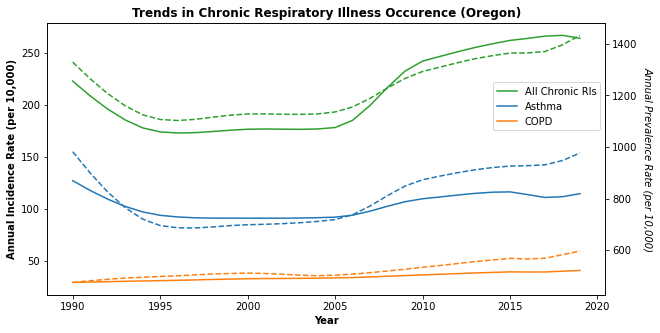

In [18]:
# We plot a dual-axis plot since both lines correspond to different values 
fig = plt.figure(figsize=(10, 5))
# plot incidence

state_incidence = state_data_rates['val']['Incidence'].reset_index().rename(columns={"year":'Year'})
state_prevalence = state_data_rates['val']['Prevalence'].reset_index().rename(columns={"year":'Year'})

# Plot all incidences
ax = sns.lineplot(data=state_incidence, x='Year', y='Asthma', 
    color = sns.color_palette('tab10')[0])
sns.lineplot(data=state_incidence, x='Year', y='Chronic obstructive pulmonary disease', 
    color = sns.color_palette('tab10')[1], 
    ax = ax)
sns.lineplot(data=state_incidence, x='Year', y='Chronic respiratory diseases', 
    color = sns.color_palette('tab10')[2], 
    ax = ax)

ax2 = ax.twinx()
# plot all prevalences
sns.lineplot(data=state_prevalence, x='Year', y='Asthma',
    color=sns.color_palette('tab10')[0],
    ls= '--', ax=ax2)
sns.lineplot(data=state_prevalence, x='Year', y='Chronic obstructive pulmonary disease', 
    color=sns.color_palette('tab10')[1],
    ls= '--', ax=ax2)
sns.lineplot(data=state_prevalence, x='Year', y='Chronic respiratory diseases',
    color=sns.color_palette('tab10')[2],
    ls= '--', ax=ax2)

# x and y labels
ax.set_xlabel('Year', weight="bold")
ax.set_ylabel('Annual Incidence Rate (per 10,000)', weight='bold')
ax2.set_ylabel('Annual Prevalence Rate (per 10,000)', fontstyle='italic',rotation=-90, labelpad=15)

# plt.legend()
legend_labels = ["All Chronic RIs", "Asthma", "COPD", ]
legend_colors = [sns.color_palette('tab10')[2], 
                 sns.color_palette('tab10')[0],
                 sns.color_palette('tab10')[1],
                ]
legend_handles = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend with custom handles and labels
ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1, 0.8))

# ax2.set_ylabel('Average Daily AQI (Fire Season)',
#                color=sns.color_palette('tab10')[1])
plt.title('Trends in Chronic Respiratory Illness Occurence (Oregon)', weight='bold')

# # set limits to the same value if desired 
# _ = ax.set_yticks(ax.get_yticks())
# _ = ax2.set_yticks(ax.get_yticks())

# ax.set_xticks(np.arange(1960, 2026, 5))
# fig.savefig("./output/figure3-comparing_smoke_AQI.png")

It seems as though COPD is not nearly as common of a diagnosis as asthma but both have become more common over the years with a slight drop for Asthma between 1995 and 2000.

Let's remake this figure so that we can see the scale of each disease on it's own.

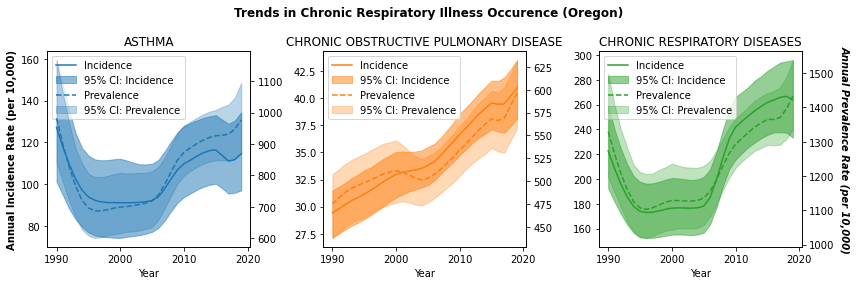

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex=False)

# List of respiratory conditions
respiratory_conditions = ["Asthma", "Chronic obstructive pulmonary disease", "Chronic respiratory diseases"]

twin_handles= []
twin_labels = []
for i, condition in enumerate(respiratory_conditions):
    # Plot Incidence
    axs[i].plot(state_data_rates['val'].index, state_data_rates['val']['Incidence'][condition],
                color=sns.color_palette('tab10')[i], label='Incidence')
    # Plot Confidence Intervals for Incidence
    axs[i].fill_between(state_data_rates['val'].index,
                        state_data_rates['lower']['Incidence'][condition],
                        state_data_rates['upper']['Incidence'][condition],
                        color=sns.color_palette('tab10')[i], alpha=0.5, label="95% CI: Incidence")

    # Create a second y-axis for Prevalence
    ax2 = axs[i].twinx()
    
    # Plot Prevalence
    ax2.plot(state_data_rates['val'].index, state_data_rates['val']['Prevalence'][condition],
             color=sns.color_palette('tab10')[i], linestyle='--', label='Prevalence')
    
    # Plot Confidence Intervals for Prevalence
    ax2.fill_between(state_data_rates['val'].index,
                     state_data_rates['lower']['Prevalence'][condition],
                     state_data_rates['upper']['Prevalence'][condition],
                     color=sns.color_palette('tab10')[i], alpha=0.3, label="95% CI: Prevalence")

    # Set y-axis labels only for left most and right most plots to reduce clutter
    if i == 0:
        axs[i].set_ylabel('Annual Incidence Rate (per 10,000)', weight='bold')
    if i ==2:
        ax2.set_ylabel('Annual Prevalence Rate (per 10,000)', 
                       fontstyle='italic', rotation=-90, labelpad=15,
                      weight='bold')
    axs[i].set_title(f"{condition.upper()}")
    
    # Get handles and labels for twin axis
    handles, labels = ax2.get_legend_handles_labels()
    twin_handles.append(handles)
    twin_labels.append(labels)
# Set x-axis label
    axs[i].set_xlabel('Year',weight='normal')

# Add legends
for i,ax in enumerate(axs):
    handles, labels = axs[i].get_legend_handles_labels()
    handles += twin_handles[i]
    labels += twin_labels[i]
    
    ax.legend(handles, labels, loc='upper left')

plt.suptitle('Trends in Chronic Respiratory Illness Occurence (Oregon)', weight='bold')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig("./output/Respiratory_Health_State_Occurence.png")

Let's do the same for the mortality rates of each disease.

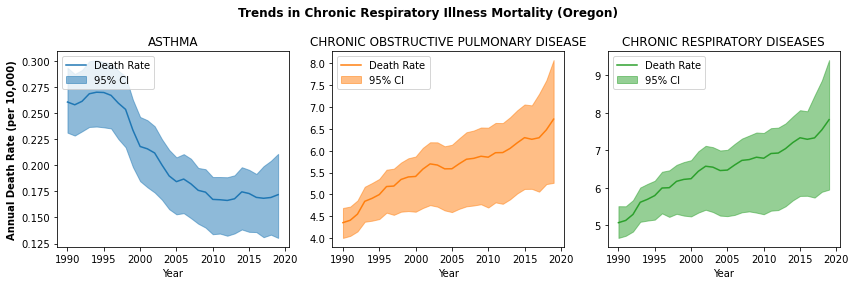

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex=False)

# List of respiratory conditions
respiratory_conditions = ["Asthma", "Chronic obstructive pulmonary disease", "Chronic respiratory diseases"]

for i, condition in enumerate(respiratory_conditions):
    # Plot Deaths
    axs[i].plot(state_data_rates['val'].index, state_data_rates['val']['Deaths'][condition],
                color=sns.color_palette('tab10')[i], label='Death Rate')
    # Plot Confidence Intervals for Deaths
    axs[i].fill_between(state_data_rates['val'].index,
                        state_data_rates['lower']['Deaths'][condition],
                        state_data_rates['upper']['Deaths'][condition],
                        color=sns.color_palette('tab10')[i], alpha=0.5, label="95% CI")

    # Set y-axis labels only for left most and right most plots to reduce clutter
    if i == 0:
        axs[i].set_ylabel('Annual Death Rate (per 10,000)', weight='bold')
    if i ==2:
        ax2.set_ylabel('Annual Death Rate (per 10,000)', 
                       fontstyle='italic', rotation=-90, labelpad=15,
                      weight='bold')
    axs[i].set_title(f"{condition.upper()}")
# Set x-axis label
    axs[i].set_xlabel('Year',weight='normal')

# Add legends
for i,ax in enumerate(axs):
    handles, labels = axs[i].get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left')

plt.suptitle('Trends in Chronic Respiratory Illness Mortality (Oregon)', weight='bold')
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig("./output/Respiratory_Health_State_Mortality.png")

We notice that Asthma mortality rates have dropped while those of COPD and Chronic RIs have steadily increased.

In [274]:
# Sort the data based on time
state_data_rates = state_data_rates.sort_index(axis=1)
# Store just the raw values into a csv
# state_data_rates.to_csv("./intermediate/oregon_cleaned_death_prevalence_incidence_1990-2019.csv")

# the data can read using the following line
# state_data_rates = pd.read_csv(
#     './intermediate/oregon_cleaned_death_prevalence_incidence_1990-2019.csv',
#     header=[0,1,2], index_col=0)

#### Now, let's look at the correlation between these all state-level variables.

In [22]:
def color_high_correlation(val):
    """
    This is a simple function that allows the pd.Styler object to 
    highlight values with correlation greater than 0.9.
    """
    color = 'red' if  ((abs(val) > 0.9) and not(np.isclose(val,1)))else 'black'
    return f'color: {color}'
    
state_data_rates['val'].corr().style.applymap(color_high_correlation)

We can also plot this visually with a heatmap. We notice that nearly all state-level indicators are very closely linked. 

Text(50.999999999999986, 0.5, 'Measure - Cause')

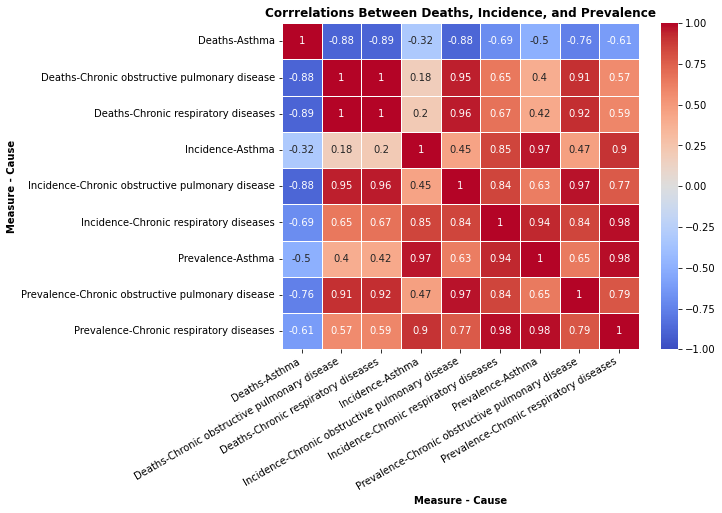

In [308]:
plt.figure(figsize=(8, 6))
h = sns.heatmap(state_data_rates['val'].corr(), annot=True, 
            cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)
# Tilt x-axis labels
_ = h.set_xticklabels(h.get_xticklabels(), rotation=30, ha='right')
h.set_title("Corrrelations Between Deaths, Incidence, and Prevalence", weight='bold')
h.set_xlabel("Measure - Cause", weight='bold')
h.set_ylabel("Measure - Cause", weight='bold')

# 4. Join All Data Together

First, let's take a look at all the county columns we have available to us.

In [24]:
# copd county data
print(deschutes_copd.columns)
# asthma county data
print(deschutes_asthma.columns)

Index(['Year', 'Age Adjusted Rate per 10,000 Population, Ages 25 and Older',
       'Crude Rate per 10,000 Population, Ages 25 and Older',
       'Crude Rate per 10,000 Population, Ages 25-44',
       'Crude Rate per 10,000 Population, Ages 45-64',
       'Crude Rate per 10,000 Population, Ages 65-84'],
      dtype='object')
Index(['Year', 'Age Adjusted Rate per 10,000 Population',
       'Crude Rate per 10,000 Population',
       'Crude Rate per 10,000 Population, Ages 0-4',
       'Crude Rate per 10,000 Population, Ages 5-14',
       'Crude Rate per 10,000 Population, Ages 15-34',
       'Crude Rate per 10,000 Population, Ages 35-64',
       'Crude Rate per 10,000 Population, Ages 65+',
       'Number of Hospitalizations'],
      dtype='object')


Let's rename these columns to something that can be transferred to the other dataset.
We incorporate (DC) to indicate that each series is a county data.

In [25]:
# county Asthma
deschutes_asthma1 = deschutes_asthma.rename(columns = {
    'Age Adjusted Rate per 10,000 Population': 'Asthma: Age-Adjusted HR (DC)',
    'Crude Rate per 10,000 Population' : 'Asthma: Crude HR (DC)',
    'Crude Rate per 10,000 Population, Ages 0-4': "Asthma: Crude HR Ages 0-4 (DC)",
    'Crude Rate per 10,000 Population, Ages 5-14': "Asthma: Crude HR Ages 5-14 (DC)",
    'Crude Rate per 10,000 Population, Ages 15-34': "Asthma: Crude HR Ages 15-34 (DC)",
    'Crude Rate per 10,000 Population, Ages 35-64': "Asthma: Crude HR Ages 35-64 (DC)",
    'Crude Rate per 10,000 Population, Ages 65+': "Asthma: Crude HR Ages 65+ (DC)",
     'Number of Hospitalizations': "Asthma: Total Hospitalizations (DC)"
})
# county COPD
deschutes_copd1 = deschutes_copd.rename(columns = {
    'Age Adjusted Rate per 10,000 Population, Ages 25 and Older' : 'COPD: Age-Adjusted HR (DC)',
   'Crude Rate per 10,000 Population, Ages 25 and Older': 'COPD: Crude HR (DC)',
   'Crude Rate per 10,000 Population, Ages 25-44': 'COPD: Crude HR Ages 25-44 (DC)',
   'Crude Rate per 10,000 Population, Ages 45-64': 'COPD: Crude HR Ages 45-64 (DC)',
   'Crude Rate per 10,000 Population, Ages 65-84': 'COPD: Crude HR Ages 65-84 (DC)',
})

In [26]:
# County Premature mortality rate
county_data = deschutes_asthma1.merge(deschutes_copd1, on = 'Year').merge(
    deschutes_premature.rename(
        columns= {'Age Adjusted Premature Death Rate': 'PDR Age-Adjusted (DC)'})
    , on ='Year', how = 'outer').sort_values(by ='Year')

In [27]:
# let's take a look at the data
county_data.head()

,Year,Asthma: Age-Adjusted HR (DC),Asthma: Crude HR (DC),Asthma: Crude HR Ages 0-4 (DC),Asthma: Crude HR Ages 5-14 (DC),Asthma: Crude HR Ages 15-34 (DC),Asthma: Crude HR Ages 35-64 (DC),Asthma: Crude HR Ages 65+ (DC),Asthma: Total Hospitalizations (DC),COPD: Age-Adjusted HR (DC),COPD: Crude HR (DC),COPD: Crude HR Ages 25-44 (DC),COPD: Crude HR Ages 45-64 (DC),COPD: Crude HR Ages 65-84 (DC),PDR Age-Adjusted (DC)
22,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.21
0,2000,8.0,6.9,24.3,6.7,3.7,4.8,11.5,92.0,13.0,13.0,0.9,12.1,67.6,31.22
1,2001,5.5,7.0,19.6,5.4,3.6,6.4,11.1,66.0,12.7,13.0,1.0,13.3,68.5,32.95
2,2002,6.5,7.5,24.9,5.9,3.7,5.8,14.0,79.0,10.8,11.0,0.7,13.0,73.3,31.48
3,2003,4.8,6.7,25.3,5.6,3.3,5.0,11.4,62.0,8.4,8.7,0.8,13.1,66.0,29.62


Let's do the same thing with the state-level data except we use "OR" to signify that it is a state data.

In [28]:
# extract the useful values (just the mean estimates) from the larger table
state_rate_vals = state_data_rates['val']
# rename columns
state_rate_vals.columns = [': '.join(col) + " (OR)" for col in state_data_rates['val'].columns]

Now, let's combine the all health indicator series into one file and store it.
Note, that we combine the files using year as a join key. We do an outer join to keep all the data we can.

In [363]:
# combine into 1 massive file
combined_data = state_rate_vals.reset_index().rename(columns={'year':'Year'}).merge(
    county_data, on = 'Year', how= 'outer')

# store data
combined_data.to_csv("./intermediate/combined_health_data.csv", index=False)